## Gotta Predict 'em all 

#### Submitted by-
#### (Group No-4,Project No-3)
    -Sukhman BP Singh
    -Indra Sardesai

In [905]:
#Importing all necessary pacakges required for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from numpy.random import binomial
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import sparse
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import scipy.stats as stats
import math

In [906]:
#Reading the csv file using pandas
df_pokm = pd.read_csv('pokemon.csv')
df_pokm.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 1. Data Exploration

In [907]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
df_pokm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [908]:
#Checking for null values

df_pokm['Type 2'].isnull().sum()

386

In [909]:
#Checking for duplicate values 
df_pokm['#'].duplicated().sum()

79

### Observations

* The Id column is denoted as '#' incorrectly.
* 414 Null values found for 'Type 2' because every pokemon doesnt have a 'Type 2'
* The datatypes for all the columns are correct
* The legendary column is boolean type
* 386 null values were found for 'Type 2'
* 79 duplicate values for the Pokemon Ids' were found


## 2. Data Cleaning

In [910]:
#Changing the '#' column to ID
df_pokm = df_pokm.rename(columns={'#':'Id'})

In [911]:
#Converting column names to lowercase
df_pokm.columns = map(str.lower, df_pokm.columns)

In [912]:
#Replacing the NaN values in Type 2 columns with NONE 
df_pokm['type 2'].fillna(value='None', inplace=True)

In [913]:
#The final dataframe 
df_pokm

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 2.1 Removing Outliers: Inter Quartile Range (IQR) Method

#### The interquartile range rule is useful in detecting the presence of outliers in a given dataset. 

In [914]:
#Creating a subset dataframe from the original dataframe 
df_pokm_subset = df_pokm[['type 1', 'attack','defense','sp. atk','sp. def','speed']]

In [915]:
#Calculating IQR
df_base_stats_subset = df_pokm[['attack','defense','sp. atk','sp. def','speed']]
Q1 = df_base_stats_subset.quantile(0.25)
Q3 = df_base_stats_subset.quantile(0.75)

IQR = Q3 - Q1

In [916]:
##Removing outliers
df_pokm_stats_out = df_pokm_subset[~((df_base_stats_subset < (Q1 - 1.5 * IQR)) |(df_base_stats_subset > (Q3 + 1.5 * IQR))).any(axis=1)]

df_pokm_stats_out.shape

(767, 6)

### Observations
* Around 54 data points were detected as outliers out of the original 800 data points. 

In [917]:
df_pokm_stats_out = df_pokm_stats_out.reset_index(drop=True)

#### For our project, we chose not to exclude the duplicate 'Id' values since different pokemons(evolved version of the same Pokemon) corresponded to same 'Id' value

## 3. Exploratory Data Analysis

### 3.1. Basic frequency Bar Graph  to check the distribution of Pokemon across Generation

In [918]:
#Value counts for 'Generation' of all pokemons
df_pokm['generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: generation, dtype: int64

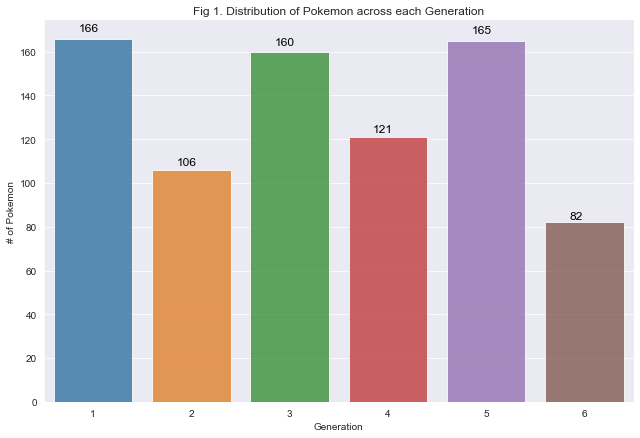

In [925]:
gen_dist = sns.catplot(
    x='generation', 
    data=df_pokm,
    kind='count', height=6, aspect=1.5, alpha=0.8,
).set_axis_labels('Generation', '# of Pokemon').set(title='Fig 1. Distribution of Pokemon across each Generation')

gen_ax = gen_dist.facet_axis(0,0)
for p in gen_ax.patches:
    gen_ax.text(p.get_x() + 0.25, 
            p.get_height() * 1.02, 
            p.get_height(), 
            color='black', rotation='horizontal', size='large')

### Observations
* Pokemons are not evenly distributed among the 6 Generations.
* The bar graph shows the distribution of the number of Pokemon for each Generation. 
1. Odd numbered Generations (1,3 and 5) have the highest number of Pokemons.
       Gen 1 = 166(highest among all 6 Generations)
       Gen 3 = 160 
       Gen 5 = 165
1. Even numbered Generations (2,4 and 6) have the lowest number of Pokemon.
       Gen 2 = 106 
       Gen 4 = 121 
       Gen 6 = 82(lowest among all 6 Generations)


### 3.2. Generations vs Legendary Graph to check the Distribution of Legendary and Non-legendary Pokemon across the 6 Generations

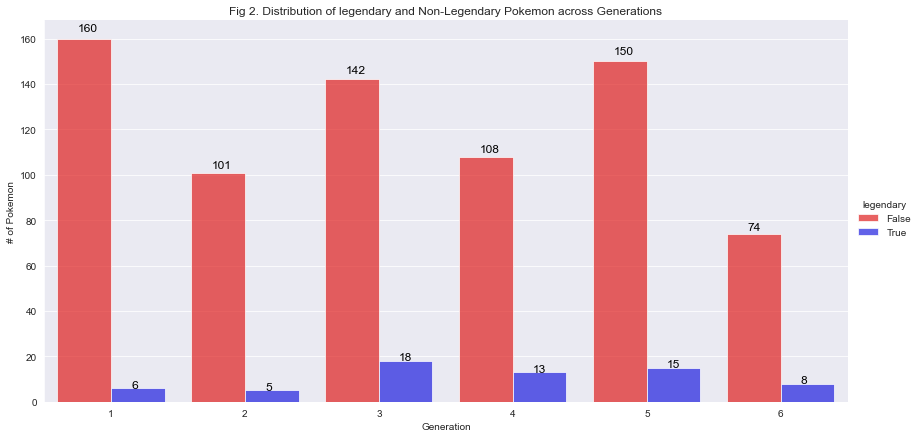

In [928]:
legen_dist = sns.catplot(x='generation', data=df_pokm,kind='count',
            hue='legendary',height=6, aspect=2, alpha=0.7,
            palette=sns.color_palette(['red', 'blue'])).set_axis_labels('Generation', '# of Pokemon').set(title="Fig 2. Distribution of legendary and Non-Legendary Pokemon across Generations")
           

legen_ax = legen_dist.facet_axis(0,0)
for p in legen_ax.patches:
    legen_ax.text(p.get_x() + 0.15,
            p.get_height() * 1.02, 
            p.get_height(), 
            color='black', rotation='horizontal', size='large')

### Observations

* Generation 3 has the highest number (18) of Legendary Pokemon.
* Generation 2 has the lowest number (5) of Legendary Pokemon.
* Generation 1, despite having the maximum number of Pokemon, has the second lowest number (6) of Legendary Pokemon.
* Generation 6, despite having the lowest number of Pokemon, has a relatively high number (8) of Legendary Pokemon.
* There is no clear trend or relation observed between the number of Legendary Pokemon, the total number of Pokemon or the Generation of Pokemon.

##### We may say that higher Generations have more number of Legendary Pokemon and Gen 6 can be considered as an exception.

### 3.3 Distribution of the number of Pokemons with respect to their Types (1&2 combined) 

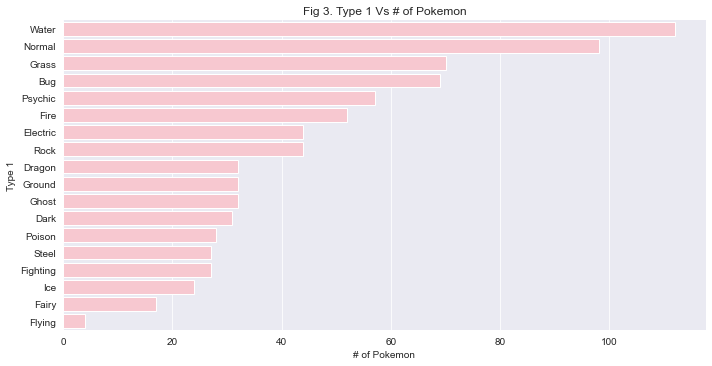

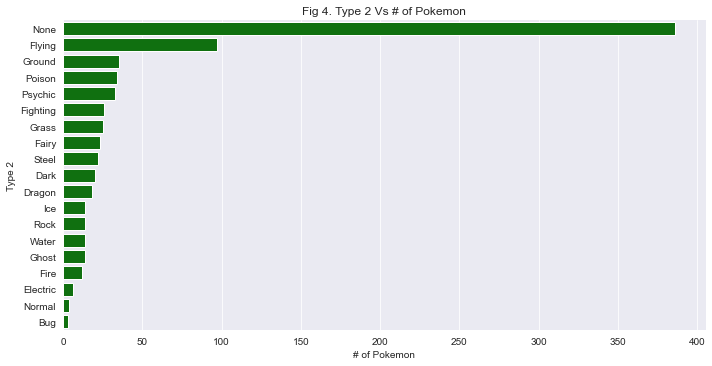

In [929]:
# Type 1 (Primary) type Vs No. of pokemons
sns.catplot(
    y='type 1',
    data=df_pokm,
    kind='count',
    order=df_pokm['type 1'].value_counts().index,
    aspect=2,
    color='pink'
).set_axis_labels('# of Pokemon', 'Type 1').set(title='Fig 3. Type 1 Vs # of Pokemon')


# Type 2 (Secondary type) Vs No. of pokemons
sns.catplot(
    y='type 2',
    data=df_pokm,
    kind='count',
    order=df_pokm['type 2'].value_counts().index,
    aspect=2,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 2').set(title='Fig 4. Type 2 Vs # of Pokemon')

### Observations
* Refering to Fig 3. & Fig 4., Pokemon with Type 1 'Water ' are the most common followed by 'Normal' which is the second most common.
* Majority of Pokemon do not have Type 2 (Their Type 2 is None).
* Flying is the least common Type 1 but is the most common Type 2 if a Pokemon has type 2.
* Bug is the least common Type 2 but is fairly common Type 1 (4th most common).

##### Hypothesis: (Bug, Flying) & (Normal, Flying) are the most common (Type 1, Type 2) combinations.


### 3.4. Heat Map distribution of the combinations of Type1 and Type2 of Pokemon.

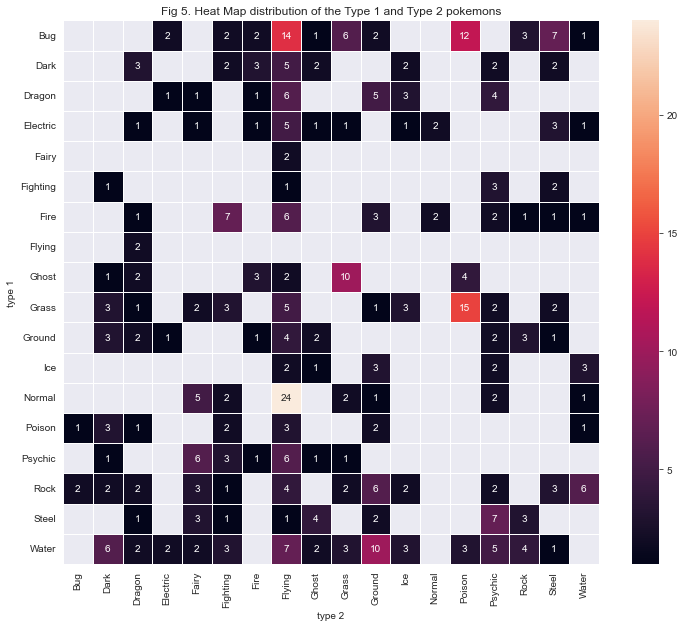

In [930]:
#Filtering out the 'NONE' secondary type values 
dual_types = df_pokm[df_pokm['type 2'] != 'None'] 
plt.figure(figsize=(12, 10))
plt.title("Fig 5. Heat Map distribution of the Type 1 and Type 2 pokemons")

sns.heatmap(
    dual_types.groupby(['type 1', 'type 2']).size().unstack(),
    linewidths=1,
    annot=True
);


### Observations
* Refering to the Fig 5. above, we observe that Normal (Type 1)+ Flying (Type 2) exhibits the highest combination of pokemons(i.e 24)
* Grass (Type 1)+ Poison (Type 2) show the second highest combination (i.e 15).
* Bug (Type 1)+ Flying (Type 2) is the third most common combination (i.e.14)


##### Limitation: Does not consider Pokemon with Type 2 as 'None'.

### 3.5. Finding out the top 10 Strongest and Weakest Pokemons

### 3.5.1 Comparing Pokemon Strength by w.r.t. the 'total' column from the data set

In [931]:
#Top 10 weakest pokemons
total_weak10 = df_pokm.sort_values('total').head(10)
total_weak10

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
206,191,Sunkern,Grass,None,180,30,30,30,30,30,30,2,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
446,401,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False
288,265,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
732,664,Scatterbug,Bug,None,200,38,35,40,27,25,35,6,False
139,129,Magikarp,Water,None,200,20,10,55,15,20,80,1,False
381,349,Feebas,Water,None,200,20,15,20,10,55,80,3,False


### Observations
* The table above shows the 10 weakest Pokemon when compared using the stat 'Total'
* All these weak Pokemons are Non-legendary
* The most common Type among these weak Pokemons is 'Bug'
* No Pokemon, Legendary or Non-legendary, from Generation 5 is present
* We can observe from the table above that many Pokemons have the same 'total' score. Therefore the comparison w.r.t. 'total' column does not give a definitive answer

In [932]:
#Top 10 strongest pokemons
total_strong10 = df_pokm.sort_values(by = 'total', ascending = False).head(10)
total_strong10

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


### Observations

* The table above shows the 10 strongest Pokemons when compared using the stat 'Total'
* All these strong Pokemons are Legendary
* The most common Type among these weak Pokemons is 'Dragon'
* There are 3 groups tied in this case:
    - 'RayquazaMega Rayquaza','MewtwoMega Mewtwo Y', 'MewtwoMega Mewtwo X'
    - 'KyogrePrimal Kyogre', 'GroudonPrimal Groudon' (Plausible since, in the lore and the game, they are equal rivals)
    - 'KyuremWhite Kyurem', 'KyuremBlack Kyurem', 'SalamenceMega Salamence', 'MetagrossMega Metagross' (Please Note: 'KyuremWhite Kyurem' & 'KyuremBlack Kyurem' are just different variants of the same Pokemon, thus their stats are identical except for Defense & Sp. Defense).
* Most Pokemons are Legendary except for 2 -> 'SalamenceMega Salamence', 'MetagrossMega Metagross' (Plausible as Legendaries are by default the strongest Pokemon in their Generation; 'SalamenceMega Salamence' & 'MetagrossMega Metagross' can be considered as the 2 strongest Non-legendary Pokemon).
* No Pokemon, Legendary or Non-legendary, from Generation 6 is present.
* To repeat, many pokemons have the same 'total' score, therefore the comparison w.r.t. 'total' column does not give a definitive answer.


##### There is a need for a much robust metric in order to compare the strengths of Pokemon and avoid ties. We therefore standardize each column seperately and convert each value into a 'z-score'. By doing this we can account for the variation in each statistic when we sum them all up. 

### 3.5.2 Comparing pokemon strength by comparing the 'z-scores'

In [933]:
#Creating pokedex dataframe 
pokedex = df_pokm[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False


In [935]:
#Creating stats only data frame 
stats = pd.merge(
    df_pokm,
    pokedex,
    on ='id'
).loc[:, ['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed',
          'total']]

#Standardizing stat columns except 'id'
std_stats = stats.drop('total', axis='columns').set_index('id').apply(
    lambda x: (x - x.mean()) / x.std())

#Adding strength column = sum of all std stats
std_stats['strength'] = std_stats.sum(axis='columns')

#Merging std_stats with 'id'
std_stats.reset_index(inplace=True)

#Displaying Top 10 strongest Pokemons based on std scores
std_strong10 = pd.merge(
                        pokedex, 
                        std_stats, 
                        on='id'
                        ).sort_values('strength', ascending=False).drop_duplicates(subset=['id']).head(10)

std_strong10.head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,strength
269,150,MewtwoMega Mewtwo X,Psychic,Fighting,1,True,1.443697,1.926967,-0.249549,3.229190,1.568599,2.213076,10.131979
703,384,Rayquaza,Dragon,Flying,3,True,1.403495,2.796197,0.680356,2.837894,0.860011,1.395216,9.973169
688,382,Kyogre,Water,None,3,True,1.202487,1.926967,0.370387,2.837894,2.985776,0.577357,9.900868
699,383,GroudonPrimal Groudon,Ground,Fire,3,True,1.202487,2.796197,2.540165,1.999404,0.505716,0.577357,9.621326
1170,493,Arceus,Normal,None,4,True,2.006520,1.057737,1.300292,1.160914,1.568599,1.558788,8.652850
1362,646,Kyurem,Dragon,Ice,5,True,2.207529,2.506454,0.680356,1.160914,0.505716,0.740929,7.801897
671,380,Latias,Dragon,Psychic,3,True,0.398453,0.478250,1.300292,1.719907,2.631482,1.231644,7.760029
418,248,TyranitarMega Tyranitar,Rock,Dark,2,False,1.202487,2.332608,2.230197,0.462172,1.568599,-0.044217,7.751845
1155,487,GiratinaOrigin Forme,Ghost,Dragon,4,True,3.212571,0.478250,1.300292,0.601920,1.568599,0.577357,7.738989
868,445,Garchomp,Dragon,Ground,4,False,1.524100,2.506454,1.145308,1.160914,0.682863,0.642786,7.662424


### Observations

* According to the strength statistic, 'MewtwoMega Mewtwo X' is the strongest pokemon with a score of 10.13
* Followed by, 'Rayquaza','Kyogre' & 'GroudonPrimal Groudon'
* Most Pokemons are Legendary except 2 - 'TyranitarMega Tyranitar' & 'Garchomp'
* 'Arceus' is not the strongest Pokemon even though it is called the 'God' Pokmeon in the lore.
* No Pokemon, Legendary or Non-legendary, from Generation 6 is present.


In [936]:
#Top 10 weakest based on std scores

std_weak10 = pd.merge(pokedex, 
                        std_stats, 
                        on='id'
                        ).sort_values('strength', ascending=True).drop_duplicates(subset=['id']).head(10)
std_weak10.head(10)

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,strength
326,191,Sunkern,Grass,None,2,False,-1.611631,-1.549954,-1.489422,-1.354557,-1.620049,-1.385506,-9.011120
471,280,Ralts,Psychic,Fairy,3,False,-1.692034,-1.694826,-1.644406,-0.935312,-1.442902,-1.058362,-8.467843
788,401,Kricketot,Bug,None,4,False,-1.330219,-1.694826,-1.148457,-1.494306,-1.230326,-1.549078,-8.447211
52,13,Weedle,Bug,Poison,1,False,-1.209614,-1.405082,-1.489422,-1.634054,-1.974344,-0.731219,-8.443735
496,298,Azurill,Normal,Fairy,3,False,-0.807597,-1.839698,-1.179454,-1.634054,-1.265755,-1.712650,-8.439208
456,265,Wurmple,Bug,None,3,False,-1.008606,-1.115339,-1.334438,-1.634054,-1.620049,-1.712650,-8.425136
49,10,Caterpie,Bug,None,1,False,-1.008606,-1.549954,-1.334438,-1.634054,-1.974344,-0.894791,-8.396186
217,129,Magikarp,Water,None,1,False,-2.013648,-2.129441,-0.714501,-1.773802,-1.974344,0.250213,-8.355523
1416,664,Scatterbug,Bug,None,6,False,-1.290017,-1.405082,-1.179454,-1.438406,-1.797196,-1.221934,-8.332091
300,172,Pichu,Electric,None,2,False,-2.013648,-1.260211,-1.954374,-1.214809,-1.442902,-0.404075,-8.290019


### Observations

* According to the strength statistic, 'Sunkern' is the weakest pokemon with a score of -9.01
* Followed by 'Ralts','Kricketot' & 'Weedle'
* No Pokemon, Legendary or Non-legendary, from Generation 5 is present.

### 3.6. Correlation of Base Stats for Pokemon 

#### To find whether certain statistics are corelated which may favour certain type of Pokemon.
#### We separate Legendary from Non-legendary Pokemon to ease our analysis.

In [937]:
df_pokm.corr()

,id,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
id,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
hp,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
sp. atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
sp. def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


### 3.6.1 Correlation Stats for Legendary Pokemon

Text(0.5, 1, 'Fig 6. Correlation between Pokemon base Stats')

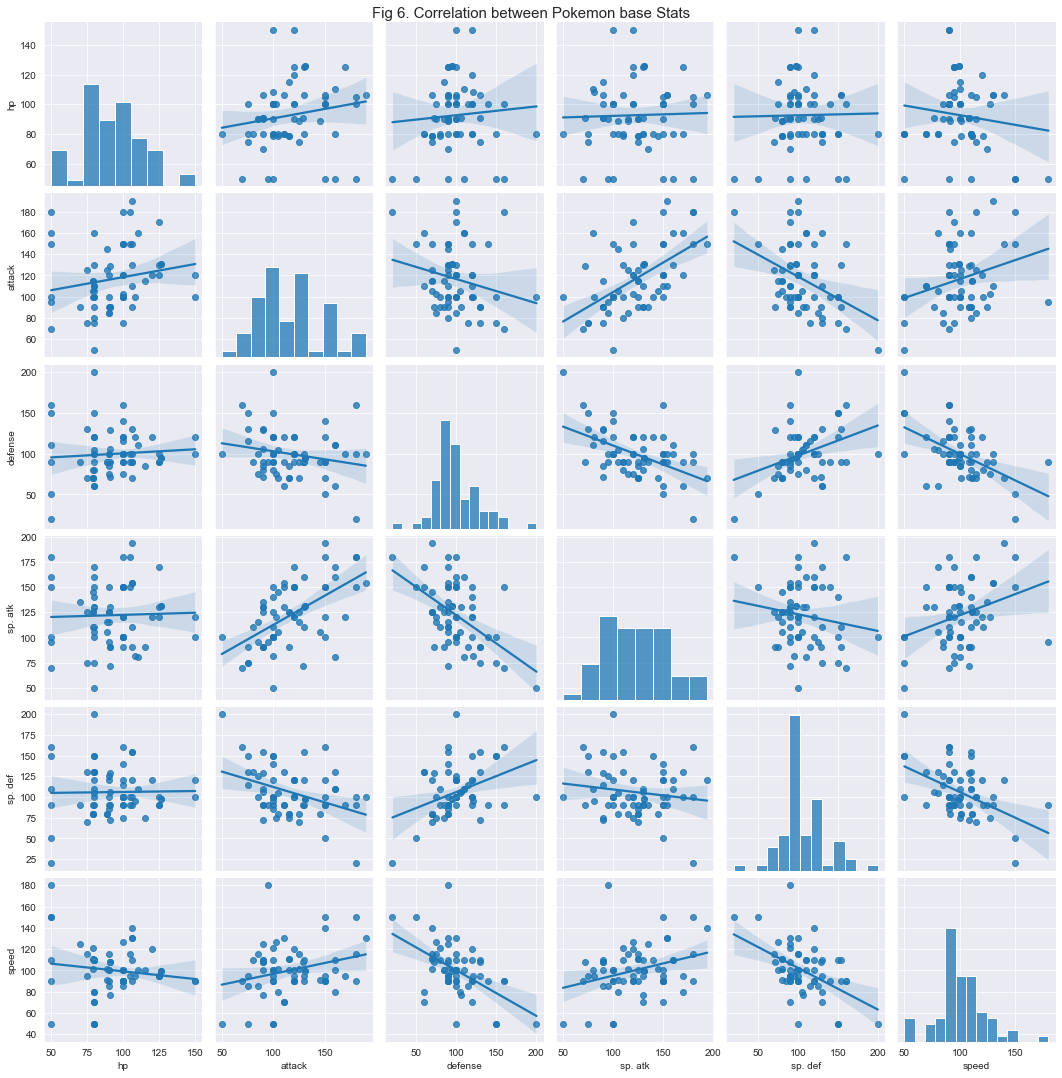

In [938]:
#Pairplot for Legendary Pokemon
leg_pokm = df_pokm[df_pokm['legendary'] == True]

sns.pairplot(
    data=leg_pokm.loc[:,'hp':'speed'],
    kind='reg'
)

plt.suptitle("Fig 6. Correlation between Pokemon base Stats",y=1,fontsize=15)

### Observations
* In Fig 6., It is observed that ('Attack','Sp. Attack') have a strong positive correlation 
* Followed by ('Defense','Sp.Defense') which also exhibit a strong positive correlation
* Meanwhile, ('Speed','Defense'),('Sp. Attack','Defense') and ('Speed','Sp. Defense') exhibit a strong negative correlation.

### Inferences
* No other stats affect the 'HP' of 'Legendary' Pokemon.
* Generally, the Statistics of 'Legendary' Pokemon are well-ballanced in order to maintain the integrity of the Game.

 ### 3.6.2 Correlation Stats for Non-legendary Pokemon

Text(0.5, 1, 'Fig 7. Correlation between Pokemon base Stats')

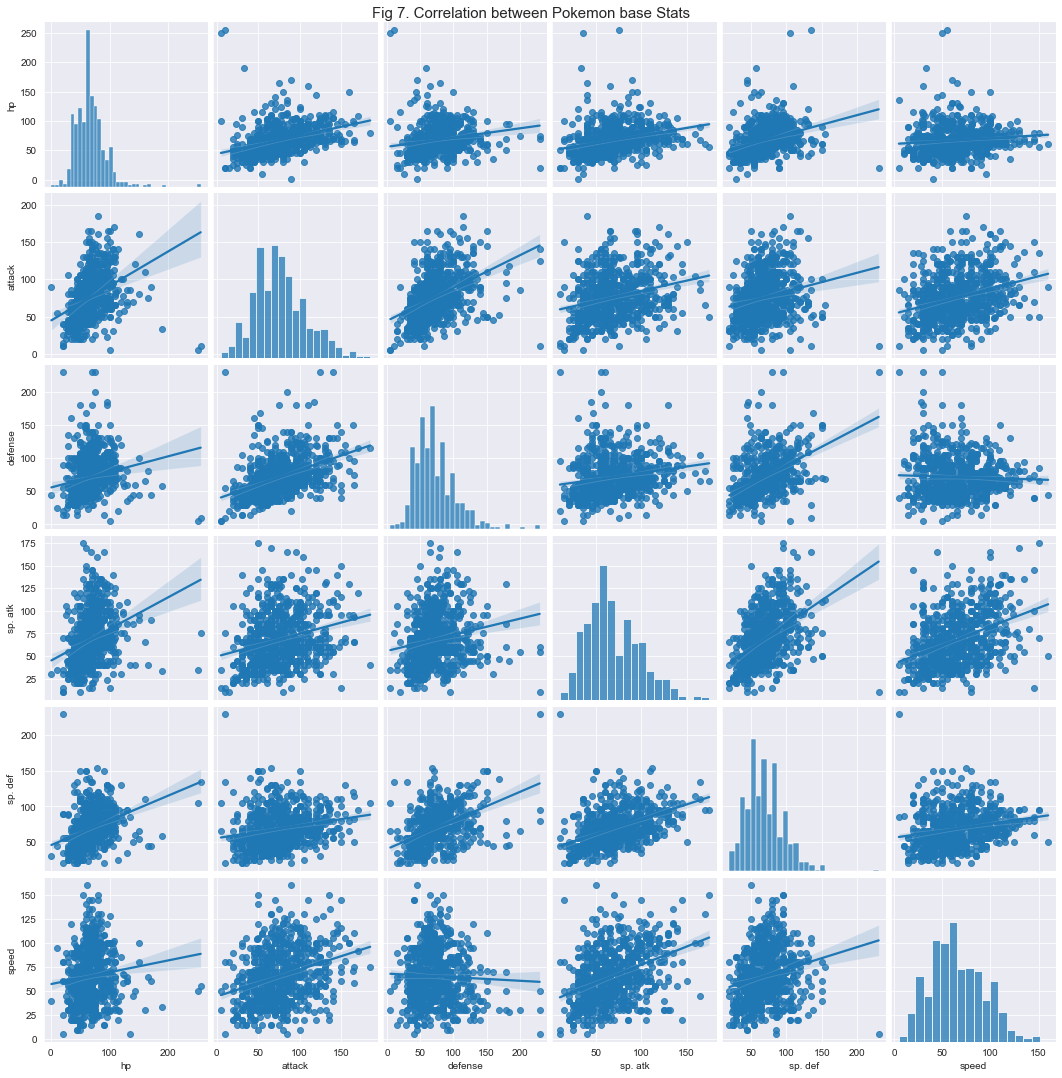

In [939]:
#Pairplot for Non-legendary Pokemon

non_leg_pokm = df_pokm[df_pokm['legendary'] == False]

sns.pairplot(
    data=non_leg_pokm.loc[:,'hp':'speed'],
    kind='reg'
)
plt.suptitle("Fig 7. Correlation between Pokemon base Stats",y=1,fontsize=15)

### Observations

* In Fig 7. we observe, ('Speed','Attack'),('Sp. Attack','Sp. Defense'),('Speed','Sp. Attack) are strongly positively correlated with densely populated data points
* Moreover, we observe a positive correlation between most combination of base-stats for non-legendary pokemon
* None of the base stats are negatively correlated.
### Inferences
* As compared to legendary pokemons, the base stats are more positively correlated and balanced in non-legendary pokemons.
* Generally, the Statistics of Non-legendary pokemons are well-ballanced in order to maintain the integrity of the Game.

## 4. Feature Selection among base stats

#### Since we have only 5 input features (attack,defense,sp.attack,sp.defense,speed), we did not perform feature selection method. Instead we evaluated feature importance using Extra Tree Classifiers.

In [897]:
#Preparing the input and output data 
X = df_pokm_stats_out[['attack','defense','sp. atk','sp. def','speed']]
y = df_pokm_stats_out["type 1"]

In [898]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50,
                                        criterion ='entropy', max_features = 5)
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# # Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

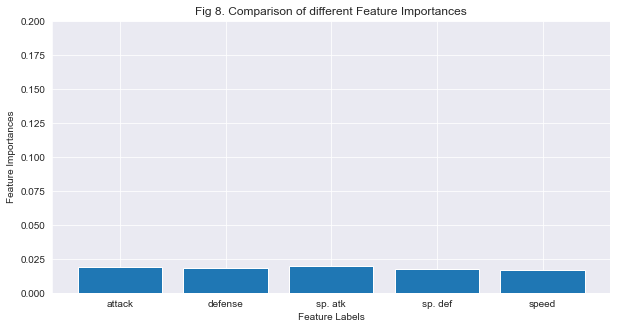

In [899]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.ylim([0, 0.2])
plt.title('Fig 8. Comparison of different Feature Importances')
plt.show()

### Observations

* We observed that the 'feature importance'(evaluated using the metric 'entropy' of decision tree) of all the 5 features are not very significant. Also, the 'feature importance' value does not change across the features. 
* This suggests that these features are not statistically significant for prediction of Pokemon types.

## 5. Model training and prediction

####  For validation, we use K-Fold cross validation method. We choose K=4 for all the models.

In [862]:
#Putting values of X and y for training the model
stats_x = df_pokm_stats_out[['attack','defense','sp. atk','sp. def','speed']].to_numpy()

In [863]:
X=stats_x
y=df_pokm_stats_out['type 1']
classes = sorted(list(y.unique()))

type_perc = df_pokm_stats_out['type 1'].value_counts(normalize=True) * 100
type_perc_data = []

for key, item in type_perc.items():
    type_perc_data.append([key, round(item, 2)])

type_perc_data.sort(key=lambda x: x[0])

all_accuracies = {}

In [864]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(536, 5)
(231, 5)
(536,)
(231,)


### 5.1 Logistic regression model for multi-class classification using ove-vs-rest built in method

* Logistic Regression is by default limited to Binary Classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.

In [865]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate

In [711]:
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
cv_scores = cross_validate(model, X, y, cv=4)
accuracy = round(np.mean(cv_scores["test_score"])*100.0, 2)

all_accuracies["Logistic Regression"] = accuracy
print("Accuracy of the model(Percentage of samples correctly predicted):",accuracy,"%")

Accuracy of the model(Percentage of samples correctly predicted): 20.47 %


In [701]:
# # define model
# model = LogisticRegression(multi_class='ovr')
# # fit model
# model.fit(X_train, y_train)
# # make predictions
# y_pred = model.predict(X_test)
# accuracy = round(model.score(X_test, y_test)*100.0, 2)
# all_accuracies["Logistic Regression"] = accuracy
# print("Accuracy of the model(Percentage of samples correctly predicted):",accuracy,"%")

In [712]:
#F-score (Precision & Recall) for built-in one-vs-rest method 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

logistic_f_score= [round(val, 2) for val in list(precision_recall_fscore_support(y_test, y_pred, labels=classes, zero_division=0)[2])]
tmp_df_log=pd.DataFrame([])
tmp_df_log['type 1']=classes
tmp_df_log['f-score']=logistic_f_score
tmp_df_log.head(5)

,type 1,f-score
0,Bug,0.00
1,Dark,0.00
2,Dragon,0.00
3,Electric,0.16
4,Fairy,0.00


### 5.2 Support Vector Machines (SVM) for multi-class classification using one-vs-one built-in method

* SVMs' are also not traditionally used for multi-class classification problems, at least not directly.
* Instead, heuristic methods like 'One-Vs-One (OvO)' & 'One-Vs-Rest (OvR)' can be used to split a multi-class classification problem into multiple binary classification datasets.

#### Reasons to use 'One-Vs-One' heuristic method for model training over 'One-Vs-Rest'.

* SVM's performance is affected by the size of the dataset. So, decreasing the size of the dataset is a counter measure for this. 
* OVO creates $^nC_2$ binary classifiers compared to $n$ classifiers in OVR. Eventually, OVO breaks down the original datasets into smaller datasets for creating the models.

In [713]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

### 5.3 SVM kernel functions using 'OneVsOne' method

* SVM algorithms use a set of mathematical functions that are defined as a kernel. The function of kernel is to take data as input and transform it into the required form. These functions can be of different types. For our project, we used linear and polynomial kernel functions.

#### 5.3.1 Linear Kernel

In [868]:
#Linear kernel SVM

lin_svm_model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')

cv_scores = cross_validate(lin_svm_model, X, y, cv=4)
accuracy = round(np.mean(cv_scores["test_score"])*100.0, 2)


# accuracy_lin = round(linear.score(X_test, y_test)*100.0, 2)
all_accuracies["SVM Linear"] =  accuracy

print("Accuracy of the model(Percentage of samples correctly predicted):", accuracy_lin,"%")

Accuracy of the model(Percentage of samples correctly predicted): 21.21 %


In [867]:
#F-score (Precision & Recall) for Linear Kernel SVM using one-vs-one method
lin_svm_model.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

svm_linear_f_score= [round(val, 2) for val in list(precision_recall_fscore_support(y_test, linear_pred, labels=classes, zero_division=0)[2])]
tmp_df_svm_lin=pd.DataFrame([])
tmp_df_svm_lin['type 1']=classes
tmp_df_svm_lin['f-score']=svm_linear_f_score
tmp_df_svm_lin.head(5)

,type 1,f-score
0,Bug,0.0
1,Dark,0.0
2,Dragon,0.0
3,Electric,0.0
4,Fairy,0.0


#### 5.3.2 Polynomial Kernel

In [873]:
#Polynomial Kernel SVM

poly_model = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
cv_scores = cross_validate(poly_model, X, y, cv=4)
accuracy = round(np.mean(cv_scores["test_score"])*100.0, 2)

# accuracy = round(poly.score(X_test, y_test)*100.0, 2)
all_accuracies["SVM Poly"] = accuracy
print("Accuracy of the model(Percentage of samples correctly predicted):", accuracy,"%")

Accuracy of the model(Percentage of samples correctly predicted): 18.38 %


In [874]:
#F-score (Precision & Recall) for all the types Polynomial Kernel SVM using one-vs-one method
poly_model.fit(X_train, y_train)
poly_pred = poly.predict(X_test) 

svm_poly_f_score= [round(val, 2) for val in list(precision_recall_fscore_support(y_test, poly_pred, labels=classes, zero_division=0)[2])]
tmp_df_svm_poly=pd.DataFrame([])
tmp_df_svm_poly['type 1']=classes
tmp_df_svm_poly['f-score']=svm_poly_f_score
tmp_df_svm_poly.head(5)

,type 1,f-score
0,Bug,0.00
1,Dark,0.15
2,Dragon,0.17
3,Electric,0.35
4,Fairy,0.00


### 5.4 Decision Tree Based Classifier

Decision tree is a tree based algorithm used to solve multi-class classification problems.It is derived from the independent variables, with each node having a condition over a feature.It decides which node to navigate next based on the condition. Once the leaf node is reached, an output is predicted. 


#### Reasons to use Decision Tree Classifier

* Decision trees are better for categorical data as compared to Logistic Regression and SVM models.

In [875]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

#### 5.4.1 Basic Decision Tree

In [876]:
clf = DecisionTreeClassifier()

In [877]:
# clf = clf.fit(X_train,y_train)

cv_scores = cross_validate(clf, X, y, cv=4)
accuracy = round(np.mean(cv_scores["test_score"])*100.0, 2)


#Predict the response for test dataset
# accuracy = round(metrics.accuracy_score(y_test, y_pred)*100.0, 2)
all_accuracies["Decision Tree"] = accuracy
print("Accuracy of the model(Percentage of samples correctly predicted):",accuracy,"%")

Accuracy of the model(Percentage of samples correctly predicted): 15.12 %


In [878]:
#F-score (Precision & Recall) for all the types using Decision Tree Classifier 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dc_score= [round(val, 2) for val in list(precision_recall_fscore_support(y_test, y_pred, labels=classes, zero_division=0)[2])]
tmp_df_dc=pd.DataFrame([])
tmp_df_dc['type 1']=classes
tmp_df_dc['f-score']=dc_score
tmp_df_dc.head(5)

,type 1,f-score
0,Bug,0.22
1,Dark,0.22
2,Dragon,0.00
3,Electric,0.00
4,Fairy,0.00


#### 5.4.2 Random Forest Classifier 

* A Random Forest Classifier is a type of tree-based machine learning algorithm (like Decision Trees) that leverages the power of multiple decision trees for making decisions. 
* As the name suggests, a random forest classifier is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. 
* The random forest then combines the output of individual decision trees to generate the final output.
* The random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. Hence, we chose Random forests for our model. 

In [879]:
from sklearn.ensemble import RandomForestClassifier

In [880]:
clf=RandomForestClassifier(n_estimators=1000, criterion="entropy", n_jobs=4)

cv_scores = cross_validate(clf, X, y, cv=4)
accuracy = round(np.mean(cv_scores["test_score"])*100.0, 2)

# accuracy = round(metrics.accuracy_score(y_test, y_pred)*100.0, 2)
all_accuracies["Random Forest"] = accuracy
print("Accuracy of the model(Percentage of samples correctly predicted):",accuracy,"%")

Accuracy of the model(Percentage of samples correctly predicted): 19.16 %


In [737]:
#F-score (Precision & Recall) for all the types using Decision Tree Classifier
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

rf_f_score= [round(val, 2) for val in list(precision_recall_fscore_support(y_test, y_pred, labels=classes, zero_division=0)[2])]
tmp_df_rf=pd.DataFrame([])
tmp_df_rf['type 1']=classes
tmp_df_rf['f-score']=rf_f_score
tmp_df_rf.head(5)


,type 1,f-score
0,Bug,0.27
1,Dark,0.13
2,Dragon,0.00
3,Electric,0.19
4,Fairy,0.00


## 6. Performance analysis of different models

### 6.1 Metric: Accuracy (No. of samples correctly predicted) plot 

Text(0.5, 1.0, 'Fig 9. Model Accuracies')

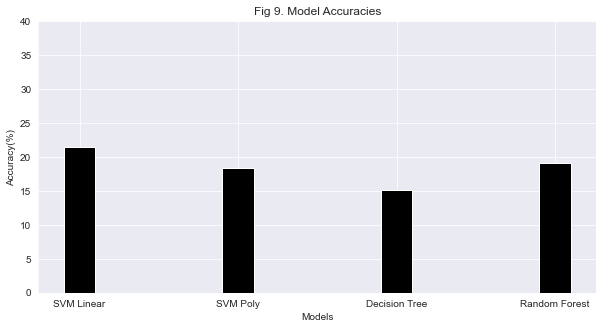

In [900]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(all_accuracies.keys(), all_accuracies.values(), width=0.2, color='black')
plt.ylim(0, 40)
plt.xlabel("Models")
plt.ylabel("Accuracy(%)")
plt.title("Fig 9. Model Accuracies")

### Observations

* The bar chart in Fig 9. illustrates the accuracy (%) of the classification models used for pokemon type prediction. 
* We observe that the SVM Linear model has the highest accuracy by far (22% approx.) as compared to the other models, which seem to show similar comparable accuracy. 
* In our view, 'Number of samples correctly predicted' is not a good measure of multi-class classification model because it says nothing about the quality of model in regard to the prediction accuracy for any particular class.

### 6.2 Metric: Weighted F-score for different classification models across all the Pokemon types

In [882]:
f_score_class_df = pd.DataFrame(type_perc_data, columns=["type 1", "percentage share(% of pokemon of this class)"])
f_score_class_df["Logistic regression f-score"] = [round(val, 2) for val in logistic_f_score]
f_score_class_df["SVM linear kernel f-score"] = [round(val, 2) for val in svm_linear_f_score]
f_score_class_df["SVM Poly(degree 3) Kernel f-score"] = [round(val, 2) for val in svm_poly_f_score]
f_score_class_df["Decision Tree f-score"] = [round(val, 2) for val in dc_score]
f_score_class_df["Random Forest f-score"] = [round(val, 2) for val in rf_f_score]

In [883]:
f_score_class_df = f_score_class_df.sort_values(by=["percentage share(% of pokemon of this class)"], ascending=False)
f_score_class_df = f_score_class_df.reset_index(drop=True)
f_score_class_df.head(4)

,type 1,percentage share(% of pokemon of this class),Logistic regression f-score,SVM linear kernel f-score,SVM Poly(degree 3) Kernel f-score,Decision Tree f-score,Random Forest f-score
0,Water,14.21,0.27,0.27,0.28,0.21,0.27
1,Normal,12.78,0.35,0.39,0.43,0.33,0.38
2,Grass,9.13,0.00,0.00,0.07,0.18,0.05
3,Bug,8.60,0.00,0.00,0.00,0.22,0.27


Text(0, 0.5, 'Weighted average F-score')

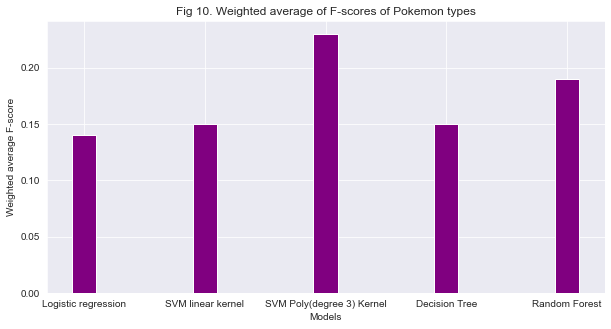

In [901]:
all_f_scores = {}
for col in f_score_class_df.columns:
    if col in ["type 1", "percentage share(% of pokemon of this class)"]:
        continue
    else:
        col_mod = col.replace(" f-score", "")
        all_f_scores[col_mod] = round(sum(f_score_class_df["percentage share(% of pokemon of this class)"]*f_score_class_df[col]/100.0), 2)
        
all_f_scores

plt.rcParams["figure.figsize"] = (10,5)
plt.bar(all_f_scores.keys(), all_f_scores.values(), width = 0.2, color="purple")
plt.title("Fig 10. Weighted average of F-scores of Pokemon types")
plt.xlabel("Models")
plt.ylabel("Weighted average F-score")

### Observations
* We evaluated the F-score for all the types for all the models. Thereafter, we calculated the weighted average(weights being the fraction of samples belonging to a type) of F-scores for a given model.

* Refering to Fig 10. we can observe from the bar plot above that 'SVM Polynomial Kernel' predicts the best followed by 'Random Forest' classifier whereas 'Decision Tree' and 'Logistic Regression' performed comparitively poor.

### Conclusion
* The input features(base stats) used for model creation and prediction are not statistically significant for prediction of Pokemon type as shown in the Fig.1 .
* Among all the different models(classifiers), 'SVM Polynomial Kernel' fairs the best according to the weighted F-score metric.

## 7. Stats distribution across types: Are they equally distributed?

In [885]:
all_class_stats_mean = {}
stats_names =["attack", "defense", "sp. atk", "sp. def", "speed"]
for class_ in classes:
    tmp_df = df_pokm_stats_out[df_pokm_stats_out["type 1"] == class_]
    class_stat_mean = {}
    for stat_name in stats_names:
        mean = round(tmp_df[stat_name].mean(), 2)
        class_stat_mean["mean_"+stat_name] = mean
    all_class_stats_mean[class_] = class_stat_mean

In [886]:
stats_mean_df = pd.DataFrame.from_dict(all_class_stats_mean)

In [887]:
stats_mean_df

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
mean_attack,69.88,88.39,105.29,68.49,61.31,96.78,83.88,78.75,74.06,73.21,93.03,71.77,73.47,74.68,62.56,94.85,88.83,73.26
mean_defense,68.03,70.23,84.25,65.40,65.56,65.93,67.33,66.25,81.23,70.80,82.42,65.00,59.85,68.82,64.54,95.29,111.83,70.83
mean_sp. atk,54.80,74.65,89.61,88.28,76.44,53.11,88.57,94.25,76.42,77.50,53.45,78.05,55.82,60.43,89.92,64.88,69.26,73.25
mean_sp. def,61.91,69.52,87.79,72.86,80.38,64.70,70.61,72.50,75.87,70.43,61.87,72.05,63.72,64.39,81.54,74.10,81.61,69.84
mean_speed,60.85,76.16,80.71,85.42,46.94,66.07,74.14,102.50,62.23,61.93,63.06,65.68,71.55,63.57,73.23,56.34,57.91,66.04


In [888]:
all_mus = []
all_sigmas = []
all_min = []
all_max = []
all_min_type = []
all_max_type = []

for stat_name in stats_names:
    tmp = stats_mean_df.loc["mean_"+stat_name].values
    all_mus.append(round(np.mean(tmp), 2))
    all_sigmas.append(round(np.std(tmp), 2))
    
    all_min.append(min(tmp))
    all_max.append(max(tmp))
    
    min_idx = list(tmp).index(min(tmp))
    max_idx = list(tmp).index(max(tmp))
    
    all_min_type.append(stats_mean_df.loc["mean_"+stat_name].index[min_idx])
    all_max_type.append(stats_mean_df.loc["mean_"+stat_name].index[max_idx])
    

Text(0.5, 1.0, 'Fig 11. Variation of base stats across all Pokemon types')

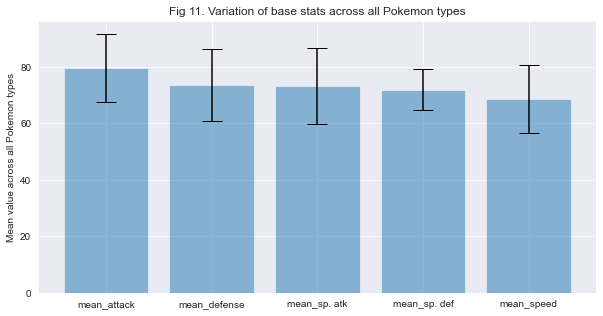

In [902]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(["mean_"+ val for val in stats_names], all_mus, yerr=all_sigmas, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Mean value across all Pokemon types')
plt.title("Fig 11. Variation of base stats across all Pokemon types")

In [891]:
base_stats_variation_df = pd.DataFrame([])
base_stats_variation_df["Stat"] = stats_mean_df.index
base_stats_variation_df["Mean"] = all_mus
base_stats_variation_df["Std dev"] = all_sigmas
base_stats_variation_df["Min"] = all_min
base_stats_variation_df["Max"] = all_max
base_stats_variation_df["Type corresponding to min"] = all_min_type
base_stats_variation_df["Type corresponding to max"] = all_max_type

base_stats_variation_df

,Stat,Mean,Std dev,Min,Max,Type corresponding to min,Type corresponding to max
0,mean_attack,79.58,12.08,61.31,105.29,Fairy,Dragon
1,mean_defense,73.53,12.67,59.85,111.83,Normal,Steel
2,mean_sp. atk,73.26,13.34,53.11,94.25,Fighting,Flying
3,mean_sp. def,71.98,7.16,61.87,87.79,Ground,Dragon
4,mean_speed,68.57,12.14,46.94,102.50,Fairy,Flying


### Observations

* Looking at the table above, we can observe that the $\textit{minimum}$ and $\textit{maximum}$ stat values vary significantly from each other for all the stats. This implies that for every stat, there is a stronger type. For example, for the attack stat, the type $\textit{Fairy}$ has the minimum value i.e $61.31$ and the type $\textit{Dragon}$ has the maximum value i.e $105.29$.

* Looking at the bar plot in Fig 11. and the base stats mean & variance values above, it is observed that 'Special Defense' varies the least as compared to the other base stats.